In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import missingno as msno  # Optional: for visualizing missing data

# Load your dataset into a pandas DataFrame
df = pd.read_csv('scraped_data.csv')  # Replace 'your_dataset.csv' with your actual file path

# Display the first few rows of the dataset
print(df.head())

Matplotlib is building the font cache; this may take a moment.


                      Provider Launched Block storage Assignable IPs  \
0        Google Cloud Platform     2013           Yes             No   
1  Oracle Cloud Infrastructure     2014           Yes            Yes   
2          Amazon Web Services     2006           Yes            Yes   
3                    IBM Cloud     2005           Yes            Yes   
4              Microsoft Azure     2010           Yes            Yes   

  SMTP support IOPS Guaranteed minimum Security  \
0        No[1]                     Yes   Yes[2]   
1          Yes                     Yes   Yes[5]   
2   Partial[6]                     Yes   Yes[7]   
3        No[9]                     Yes  Yes[10]   
4      Yes[11]                     Yes  Yes[12]   

                                           Locations             Notes  
0  br, ca, cl, us, be, ch, de, es, fi, it, po, nl...  SMTP blocked.[4]  
1  us, ca, br, de, uk, nl, ch, in, aus, jp, kr, saud               NaN  
2  us, ca, br, ie, de, uk, cn, sg, au, jp

Step 3: Handle missing values

,Provider,Launched,Block storage,Assignable IPs,SMTP support,IOPS Guaranteed minimum,Security,Locations,Notes
0,Google Cloud Platform,2013,Yes,No,No[1],Yes,Yes[2],"br, ca, cl, us, be, ch, de, es, fi, it, po, nl...",SMTP blocked.[4]
2,Amazon Web Services,2006,Yes,Yes,Partial[6],Yes,Yes[7],"us, ca, br, ie, de, uk, cn, sg, au, jp, kr, in...",List of bugs[8]
4,Microsoft Azure,2010,Yes,Yes,Yes[11],Yes,Yes[12],"ca, us, br, ie, nl, de, uk, cn, au, jp, in, kr...",List of bugs[13]
6,Rackspace,1998,Partial,No,Yes,No,Yes[15],"us, au, hk",root volume is a fixed size


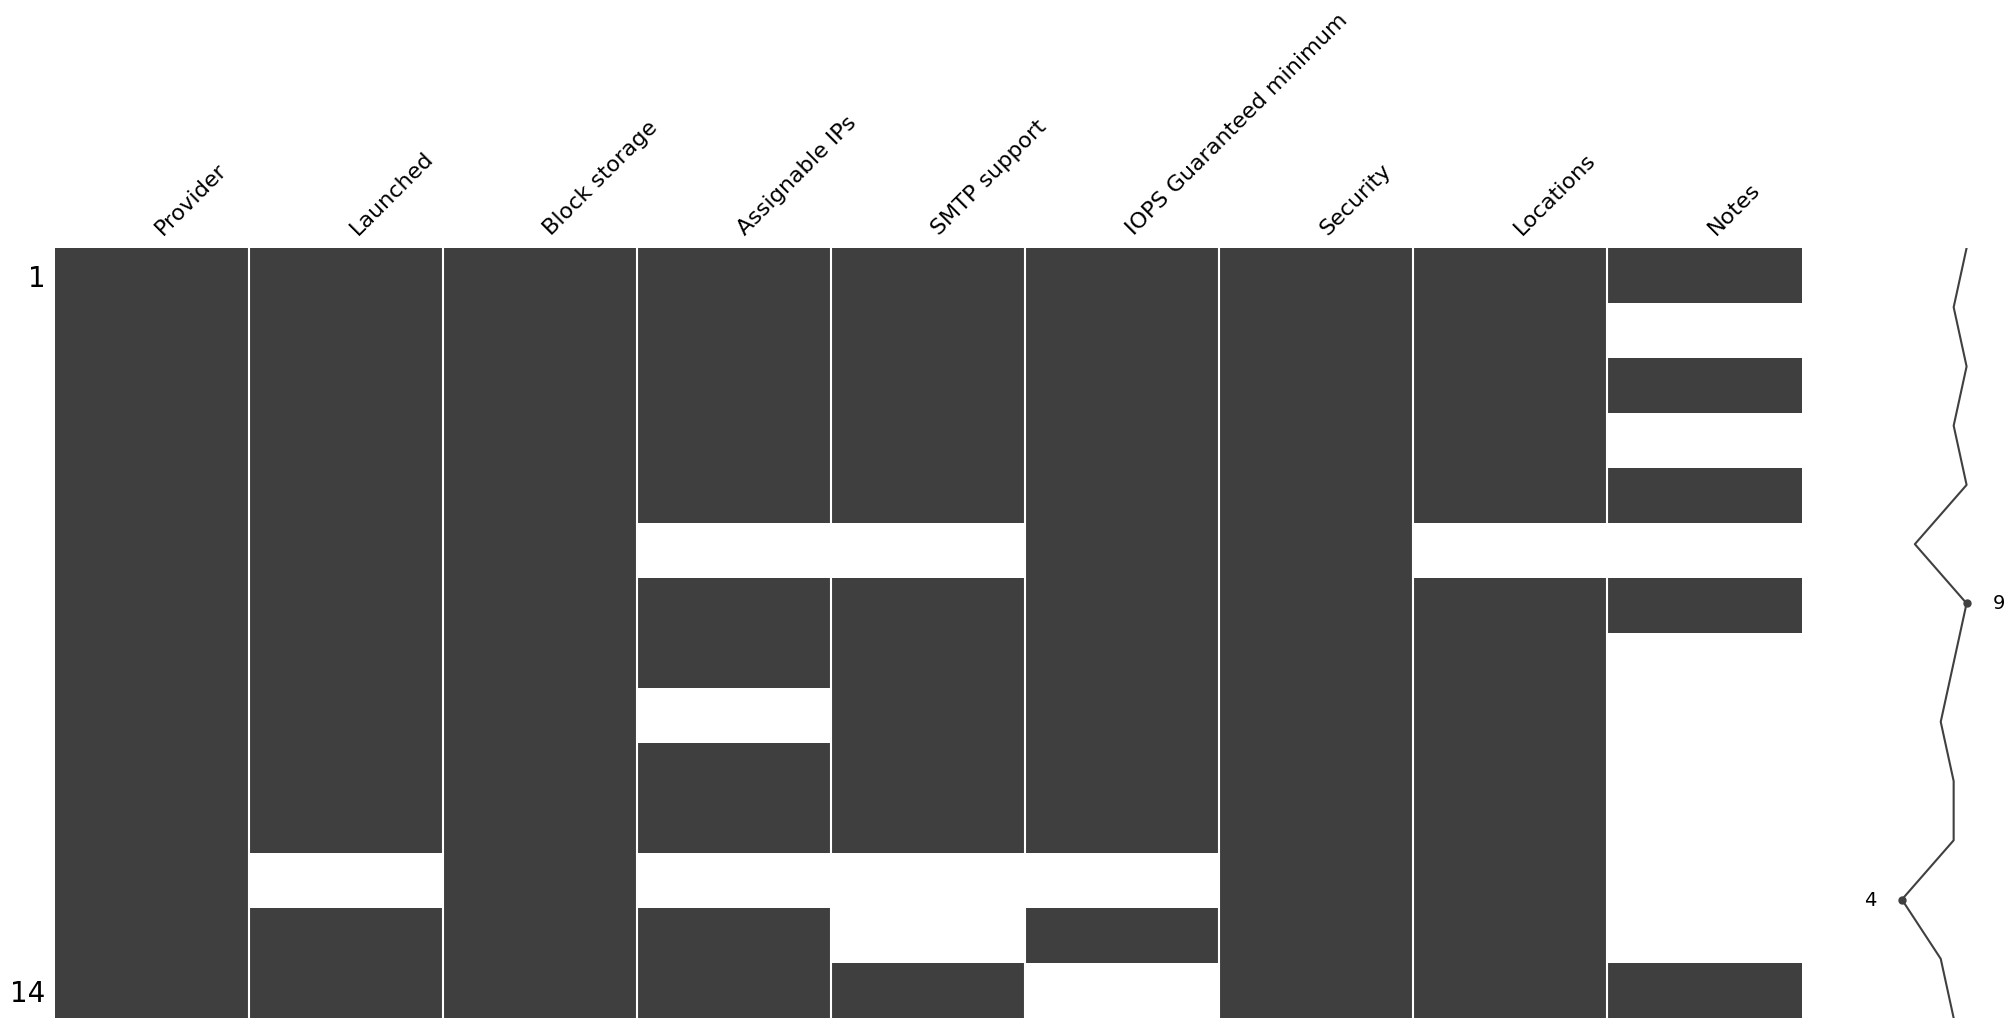

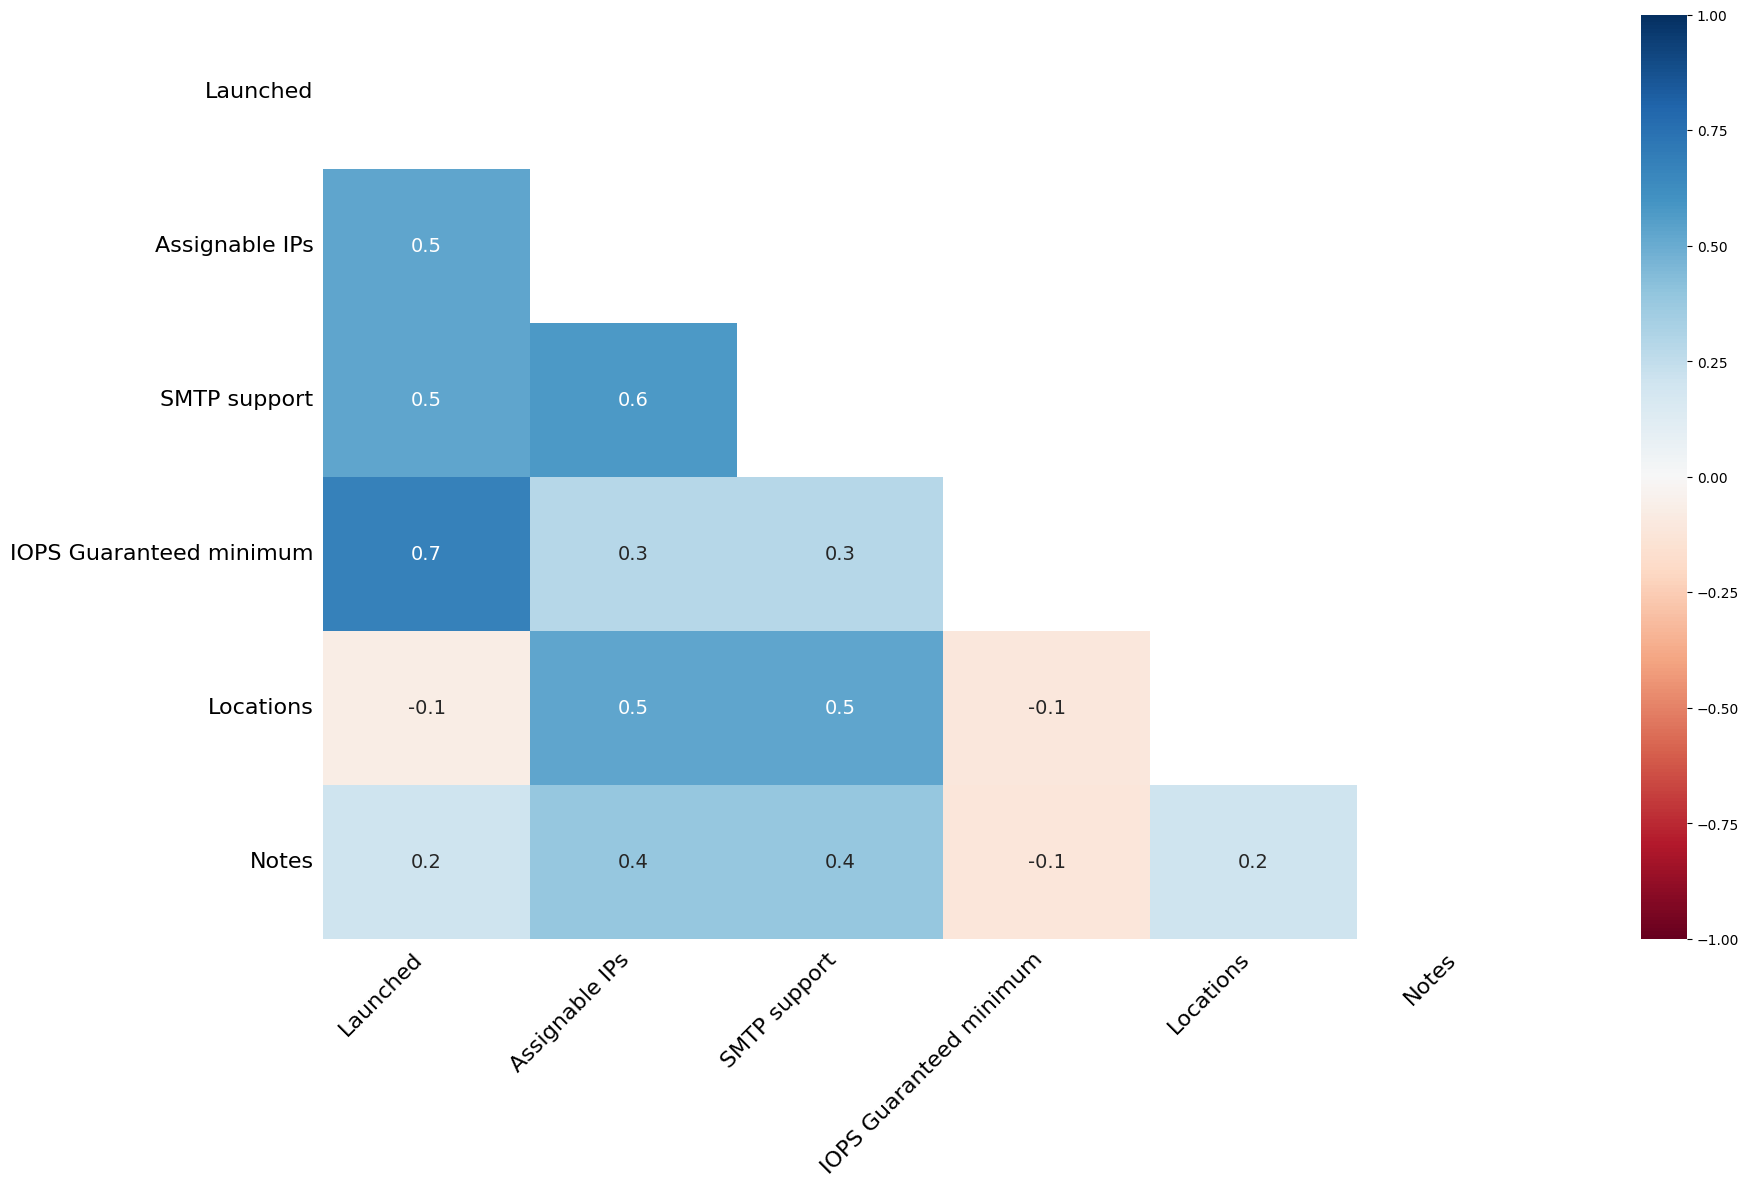

In [3]:
# Visualize missing data (optional)
msno.matrix(df)
msno.heatmap(df)

# Drop rows with missing values
df_cleaned = df.dropna()
df_cleaned

# Or, fill missing values with the mean
# df_filled = df.fillna(df.mean())

1. Identify outliers

In [7]:
# Identify outliers using Z-score
from scipy import stats


numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
#z_scores = np.abs(stats.zscore(df_cleaned))
z_scores = np.abs(stats.zscore(df_cleaned[numeric_cols]))
df_no_outliers = df_cleaned[(z_scores < 3).all(axis=1)]
df_no_outliers

# Or cap outliers at a threshold
# upper_limit = df_cleaned['column_name'].quantile(0.95)
# df_cleaned['column_name'] = np.where(df_cleaned['column_name'] > upper_limit, upper_limit, df_cleaned['column_name'])

,Provider,Launched,Block storage,Assignable IPs,SMTP support,IOPS Guaranteed minimum,Security,Locations,Notes
0,Google Cloud Platform,2013,Yes,No,No[1],Yes,Yes[2],"br, ca, cl, us, be, ch, de, es, fi, it, po, nl...",SMTP blocked.[4]
2,Amazon Web Services,2006,Yes,Yes,Partial[6],Yes,Yes[7],"us, ca, br, ie, de, uk, cn, sg, au, jp, kr, in...",List of bugs[8]
4,Microsoft Azure,2010,Yes,Yes,Yes[11],Yes,Yes[12],"ca, us, br, ie, nl, de, uk, cn, au, jp, in, kr...",List of bugs[13]
6,Rackspace,1998,Partial,No,Yes,No,Yes[15],"us, au, hk",root volume is a fixed size
